3-1. 미니 프로젝트 : 가위바위보 분류기를 만들자
지난 시간 배운 내용을 바탕으로 가위바위보 분류기를 만들도록 하겠습니다.
가장 먼저 해야 할 일은 뭘까요? 네, 첫 번째!!!! 데이터를 준비해야 합니다.
가위바위보 이미지를 모아 놓은 곳은 없으므로, 우리가 직접 사진을 찍어서 모아봅시다.

- 라이브러리 버전을 확인해 봅니다
사용할 라이브러리 버전을 둘러봅시다.

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

## 데이터를 준비하자
💡 호옥시라도 웹캠이 없다면?

일단은 아래 내용을 쭉 읽고 숙지해주세요! 웹캠이 없는 경우 라는 토글에서 기다리고 있겠습니다. 물론 웹캠이 있다면 꼭 아래 내용을 따라해주세요 😉

🔶 데이터 만들기
(1) 우리는 노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장을 만들어 볼거예요. 그런데 300장을 어느 세월에 만들까요?

걱정하지 마세요. 구글의 teachable machine 사이트에서 쉽게 데이터를 만들어볼 수 있습니다. 아래 사이트에서 Get Started 버튼을 눌러보세요. 그 다음, Image Project - Standard image model을 선택하면, Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 멋진 화면이 나타납니다.

https://teachablemachine.withgoogle.com/

(2) 먼저 가위 이미지 데이터를 만들어 봅시다. 웹캠 앞에 가위 포즈를 취하면서 <Hold to Record> 버튼을 누르면 이미지가 캡쳐됩니다. 딥러닝 모델이 인식하기 좋게끔 여러분들 손이 잘 보이게 찍어주세요.

- 여러 각도에서 찍어보세요.
- 여러 크기로 찍어보세요.
- 혼자하면 다양한 각도와 크기를 저장할 수 없으니, 옆 동료와 함께 하세요.
- 좋은 데이터가 좋은 결과를 낳는다는 것을 꼭 기억하세요.

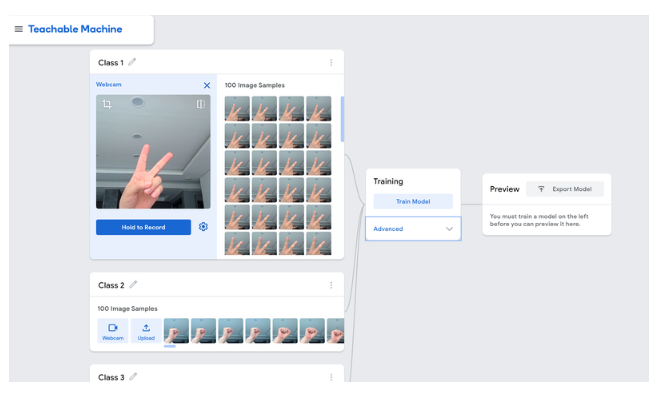


❗주의 만약 웹캠 사용 버튼을 눌렀을 때 아래 화면처럼 에러가 난다면, 브라우저에서 웹캠을 사용할 수 있는 권한을 허용해 주어야 합니다.

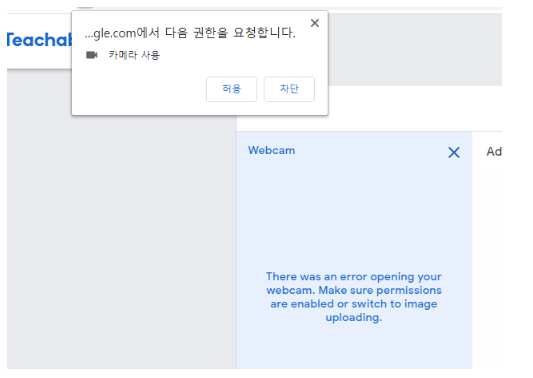

(3) 100장의 가위 이미지를 캡쳐했다면, 우상단의 메뉴 아이콘을 눌러 다운로드 합니다.

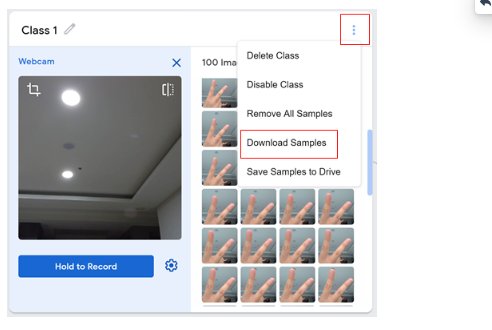


(4) 가위 이미지들을 "scissor.zip"이라는 파일 이름으로 본인 컴퓨터에 저장해주세요. 바위와 보 이미지들에 대해서도 위 과정을 진행하세요. (각각 "rock.zip", "paper.zip" 이름으로 저장해주세요.)



🔶 디렉토리 만들기
이제 클라우드에 실습용 디렉토리 rock_scissor_paper 및 하위 디렉토리들을 만들어, 데이터셋을 올릴 차례입니다!

```
# 디렉토리 만들기
$ mkdir -p ~/aiffel/rock_scissor_paper/scissor
$ mkdir -p ~/aiffel/rock_scissor_paper/rock
$ mkdir -p ~/aiffel/rock_scissor_paper/paper

$ ls -l ~/aiffel/rock_scissor_paper
```

> 토막 리눅스 사용법

mkdir -p : mkdir를 사용하여 하위 디렉토리를 생성할때 차례대로 만들지 않고 중간 디렉토리 없이 바로 그 다음 하위 디렉토리를 만들게되면 "디렉토리를 생성할 수 없습니다." 라는 메시지가 나오는데, -p 옵션을 주어 생성하게 되면 자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리를 생성하게 됩니다.





☁️ 이미지 업로드 방법
오른쪽 메뉴에서 Cloud Jupyter를 열어주세요.
rock.zip을 올리고 싶다면 rock_scissor_paper/rock 디렉토리로 이동 후, Upload버튼을 눌러주세요. 드래그 앤 드롭도 가능합니다.
가위와 보 데이터셋에 대해서도 위 과정을 진행해주세요.
여기까지 성공하셨다면 아래와 같은 구조를 갖고 있을 것입니다.

```
aiffel
└── rock_scissor_paper
    ├── rock
        └── rock.zip
    ├── scissor
        └── scissor.zip
    └── paper
        └── paper.zip
```
클라우드 이미지 압축 해제
압축 해제를 하려면 Cloud shell을 열고 아래 명령어를 입력해주세요.

```
# 원하는 디렉토리로 이동 =3
$ cd  ~/aiffel/rock_scissor_paper/rock

# 압축 해제 명령어 : unzip <파일명>.zip
$ unzip rock.zip

# 가위, 보에 대해서도 똑같이 실행!
$ cd  ~/aiffel/rock_scissor_paper/scissor
$ unzip scissor.zip

$ cd  ~/aiffel/rock_scissor_paper/paper
$ unzip paper.zip

```


이미지 예시
rock_scissor_paper/paper 폴더 내 이미지들은 아래와 같이 저장이 되어 있을 것입니다.



데이터 불러오기 + Resize 하기

(5) 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?

### 데이터 불러오기 + Resize 하기

(5) 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해볼 거예요. 그러려면 먼저 라이브러리를 불러와야 겠죠?

In [ ]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

In [ ]:
from google.colab import drive
import os

# 마운트할 디렉토리 경로
mount_point = '/content/drive/MyDrive/Data/rock_scissor_paper'


In [ ]:
import zipfile

# 압축 해제할 paper.zip 파일 경로
zip_path = '/content/drive/MyDrive/Data/rock_scissor_paper/paper.zip'

# 압축 해제할 디렉토리 경로
extract_path = '/content/drive/MyDrive/Data/rock_scissor_paper/paper'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# 압축 해제할 rock.zip 파일 경로
zip_path = '/content/drive/MyDrive/Data/rock_scissor_paper/rock.zip'

# 압축 해제할 디렉토리 경로
extract_path = '/content/drive/MyDrive/Data/rock_scissor_paper/rock'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# 압축 해제할 scissor.zip 파일 경로
zip_path = '/content/drive/MyDrive/Data/rock_scissor_paper/scissor.zip'

# 압축 해제할 디렉토리 경로
extract_path = '/content/drive/MyDrive/Data/rock_scissor_paper/scissor'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# 압축 해제할 test_paper.zip 파일 경로
zip_path = '/content/drive/MyDrive/Data/rock_scissor_paper/test/paper.zip'

# 압축 해제할 디렉토리 경로
extract_path = '/content/drive/MyDrive/Data/rock_scissor_paper/test/paper'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# 압축 해제할 test_rock.zip 파일 경로
zip_path = '/content/drive/MyDrive/Data/rock_scissor_paper/test/rock.zip'

# 압축 해제할 디렉토리 경로
extract_path = '/content/drive/MyDrive/Data/rock_scissor_paper/test/rock'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# 압축 해제할 test_scissor.zip 파일 경로
zip_path = '/content/drive/MyDrive/Data/rock_scissor_paper/test/scissor.zip'

# 압축 해제할 디렉토리 경로
extract_path = '/content/drive/MyDrive/Data/rock_scissor_paper/test/scissor'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

이제 가위 이미지를 불러와서 28x28 사이즈로 변경할 겁니다. 아래 코드를 실행해보세요. 이미지의 크기가 28x28 로 바뀌었나요?

In [ ]:
import glob
import zipfile
from PIL import Image

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/Data/rock_scissor_paper/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

자 그러면, 바위 이미지도 28x28 로 만들어 볼까요? 아래 빈 칸에 코드를 작성하고, 실행해보세요. 바위 이미지가 모두 28x28로 바뀌어야 합니다.






In [ ]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/Data/rock_scissor_paper/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

- 예시 코드

```
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

resize_images(image_dir_path)

print("바위 이미지 resize 완료!")
```

마지막으로 보 이미지도 28x28로 만들어 봅시다.

In [ ]:
# 보자기 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 보자기 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/Data/rock_scissor_paper/paper'
resize_images(image_dir_path)

print("보자기 이미지 resize 완료!")

 예시 코드
```
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
```
(6) 숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었던 것 기억하시죠? 여러분들이 아직 코딩에 익숙하지 않을 수 있으므로, 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들어 드릴 거예요. 이 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있을 겁니다.

load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다. 여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다. 숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠? 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것입니다.

In [ ]:
import numpy as np
import os
import glob
from PIL import Image

def load_data(img_path, number_of_data=1820):
    img_size = 28
    color = 3
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob(os.path.join(img_path, 'scissor', '*.jpg')):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 0
        idx = idx + 1

    for file in glob.iglob(os.path.join(img_path, 'rock', '*.jpg')):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 1
        idx = idx + 1

    for file in glob.iglob(os.path.join(img_path, 'paper', '*.jpg')):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 2
        idx = idx + 1

    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/Data/rock_scissor_paper'
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train / 255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

In [ ]:
import numpy as np

def load_data(img_path, number_of_data=1820):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/content/drive/MyDrive/Data/rock_scissor_paper/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/content/drive/MyDrive/Data/rock_scissor_paper/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/content/drive/MyDrive/Data/rock_scissor_paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/content/drive/MyDrive/Data/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

한번 이미지를 불러 볼까요?

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

- 딥러닝 네트워크 설계하기

자 이제 데이터의 준비가 끝났습니다. 이제 여러분들이 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
n_channel_1=32
n_channel_2=64
n_dense=128
n_train_epoch=10

model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

## 딥러닝 네트워크 학습시키기

잘 설계가 되었다면, 이제 학습을 시켜봅시다. 아마도 여러분들의 데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.

In [ ]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=12)

예시 코드
```
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)
```

얼마나 잘 만들었는지 확인하기(테스트)
여러분들은 300장의 가위바위보 이미지를 만들어 모두 학습에 사용했습니다. 그러므로 테스트 데이터가 없죠. 옆 친구의 이미지 데이터 300장을 받아오세요. 그리고 그것을 테스트 데이터로 하여 test accuracy를 측정해보세요. (만약 웹캠이 없는 경우 섹션을 진행하신 경우, 이미 test 데이터셋이 준비돼있으니 친구에게 조르지 않으셔도 됩니다)
```
# test 디렉토리를 생성해서, 친구에게 받은 데이터를 업로드해보세요.
$ mkdir -p ~/aiffel/rock_scissor_paper/test
```
우선 테스트용 데이터인 x_test, y_test를 만들어 봅시다.

In [ ]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

예시 코드
```
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)
```


얼마나 잘 만들었는지 확인하기(테스트)
여러분들은 300장의 가위바위보 이미지를 만들어 모두 학습에 사용했습니다. 그러므로 테스트 데이터가 없죠. 옆 친구의 이미지 데이터 300장을 받아오세요. 그리고 그것을 테스트 데이터로 하여 test accuracy를 측정해보세요. (만약 웹캠이 없는 경우 섹션을 진행하신 경우, 이미 test 데이터셋이 준비돼있으니 친구에게 조르지 않으셔도 됩니다)
```
# test 디렉토리를 생성해서, 친구에게 받은 데이터를 업로드해보세요.
$ mkdir -p ~/aiffel/rock_scissor_paper/test
```
우선 테스트용 데이터인 x_test, y_test를 만들어 봅시다.

In [ ]:
image_dir_path = '/content/drive/MyDrive/Data/rock_scissor_paper/test/scissor'
resize_images(image_dir_path)

image_dir_path = '/content/drive/MyDrive/Data/rock_scissor_paper/test/rock'
resize_images(image_dir_path)

image_dir_path = '/content/drive/MyDrive/Data/rock_scissor_paper/test/paper'
resize_images(image_dir_path)

image_dir_path = '/content/drive/MyDrive/Data/rock_scissor_paper/test'
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test / 255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

예시 코드
```
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))
```
테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.

In [ ]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


예시 코드
```
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))
```


더 좋은 네트워크 만들어보기
시험용 데이터x_test에 대한 인식률 test accuracy가 train accuracy보다 많이 낮게 나오지는 않았나요? 만약 그렇다면 그 이유는 무엇일까요? MNIST 손글씨 데이터 때처럼 test accuracy가 train accuracy에 근접하도록 개선 방법을 찾아 봅시다.

노드를 마치며...
여러분 미니 프로젝트는 잘 마치셨나요? 여러분은 이번 노드를 통해 다음의 내용을 배웠습니다.

이미 잘 정제된 10개 클래스의 숫자 손글씨 데이터를 분류하는 classifier 만들기
정제되지 않은 웹캠 사진으로부터 데이터 만들어보기
흑백 사진이 아닌 컬러 사진을 학습하는 classifier 만들기
분류하고자 하는 클래스의 개수를 마음대로 조절하기 (10개에서 3개로)
그러면 오늘 배운 내용을 바탕으로 마스크 쓴 사람과 안 쓴 사람을 구분하는 프로젝트도 금방 만드실 수 있겠죠? AIFFEL 입구에서 마스크 안 쓴 사람을 자동으로 감지하고 알람을 주는 시스템을 만들어 주실 용자분 계실까요?!!!